In [25]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()
# Get the parent directory
parent_dir = os.path.dirname(current_dir)
# Add the parent directory to the Python path
sys.path.append(parent_dir)
root_dir = os.path.abspath(os.sep)
sys.path.append(os.path.dirname(os.path.abspath("")))

from Functions.samples import Subsample_random
from Functions.base import Dataset, get_train_test_loader
from Functions.modules import Siren
from Functions.utils import loss_func_AC
from Functions.utils import leastsquares_fit
from Functions.utils import equation_residual_AC
from Functions.library import library_deriv
import Functions.plot_config_file
import scipy.io
import numpy as np
from scipy import linalg
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import train_test_split
import warnings
import time
import torch
import numpy as np

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


(1200, 64, 64)
(64, 64)
4915200


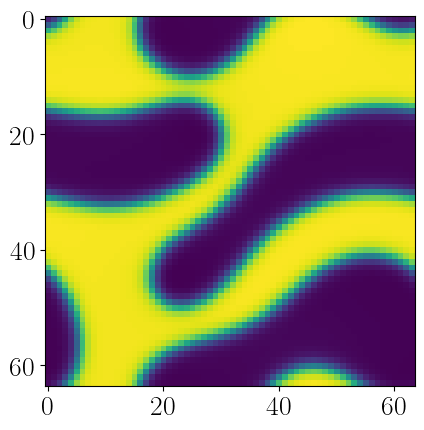

In [28]:
#ch_frame= np.load('data/CH_frame1200_x64_y64.npy')

ch_frame= np.load('data/CH_Frame1200_X64_Y64_GammaOne_1_GammaTwo_1.npy')


print(ch_frame.shape)

plt.imshow(ch_frame[0,:,:])
plt.imshow(ch_frame[1,:,:])
plt.imshow(ch_frame[10,:,:])
#plt.imshow(ch_frame[1000,:,:])


print(ch_frame[0,:,:].shape)

def calculate_theta(features, u_pred):
    thetas = torch.cat(
        [
            (features[:, 1:2] + features[:, 2:3]),
            (torch.pow((2 * u_pred - 1), 2) * u_pred * (1 - u_pred)),
            (u_pred * (1 - u_pred) * (2 * u_pred - 1)),
            (u_pred * (1 - u_pred)),
        ],
        dim=1,
    )

    return thetas


print(1200*64*64)



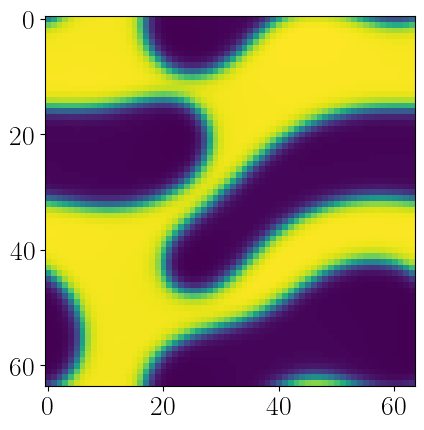

In [18]:
plt.imshow(ch_frame[50,:,:])


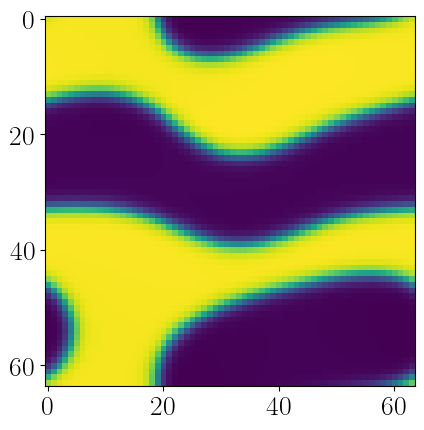

In [19]:
plt.imshow(ch_frame[200,:,:])


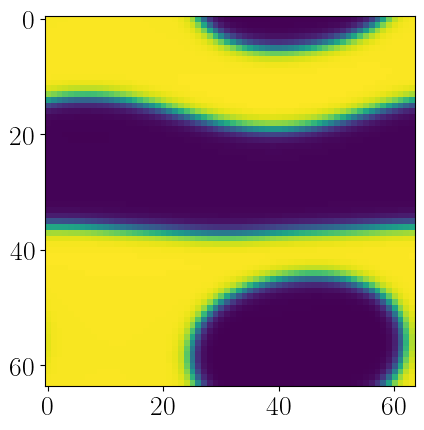

In [20]:
plt.imshow(ch_frame[500,:,:])


In [22]:



ch_frame= np.load('data/CH_frame1200_x64_y64.npy')

print(ch_frame.keys())
t_data = data["t"].flatten()
x_data = data["x"].flatten()
u_data = data["usol"]

t = data["t"].flatten()
x = data["x"].flatten()

### use the below if the data is not normalized already
min_t = t.min()
max_t = t.max()

t_std = (t - t.min(axis=0)) / (t.max(axis=0) - t.min(axis=0))
t_norm = t_std * (1 - (-1)) -1
t_scaling = 1

x_std = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_norm = x_std * (1 - (-1)) -1
x_scaling = 1



AttributeError: 'numpy.ndarray' object has no attribute 'keys'